<h3>Import packages<h3>

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<h3>Preprocess the data<h3>

In [19]:
df = pd.read_csv('data.csv',encoding = "utf-8")
df = df.fillna(df.mean())
df.head()
X = df.drop('Wage',axis=1)
y = df['Wage']
df.head()

,Wage,Age,Overall,Potential,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Weight,Crossing,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,1,31,94,94,1,5.0,4.0,4.0,159.0,84.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,1,31,91,91,0,5.0,4.0,3.0,190.0,77.0,...,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0
2,1,32,91,91,0,4.0,4.0,4.0,146.0,86.0,...,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0
3,1,33,94,94,0,5.0,4.0,5.0,183.0,84.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
4,1,32,91,91,0,4.0,3.0,3.0,181.0,66.0,...,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0


<h3>Standardize the data<h3>

In [20]:
sc = StandardScaler()
X = sc.fit_transform(X)

<h3>Slice taining and testing data (70%taining、30%testing)<h3>

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<h3>Set knn parameters<h3>

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
#設取鄰近鄰居3個,且每個鄰居權重一樣
knn.fit(X_train, y_train)
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

<h3>Model accuracy and confusion matrix<h3>

In [15]:
print(metrics.classification_report(y_test, knn.predict(X_test)))#預測出來的結果報告
accuracy = metrics.accuracy_score(y_test, knn.predict(X_test))
print(accuracy)

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      4169
           1       0.71      0.65      0.68      1283

    accuracy                           0.86      5452
   macro avg       0.80      0.78      0.79      5452
weighted avg       0.85      0.86      0.85      5452

0.8552824651504035


In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<h3>Plot confusion matrix<h3>

Confusion matrix, without normalization
[[3834  335]
 [ 454  829]]


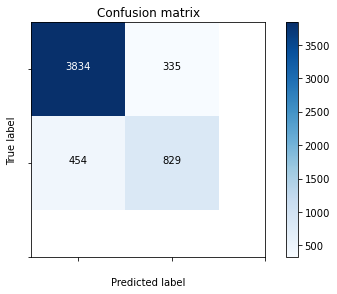

In [17]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, knn.predict(X_test))
target_names = [' ', ' ', ' ']
plot_confusion_matrix(cnf_matrix, classes=target_names) 
plt.show()